In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [14]:
# Constants
p_amb = 102387.15 # Pa
stagTemp = 295 #
T_amb = 295 #K K
jetDiam = 0.00508 # m
A_exit = np.pi * (jetDiam/2)**2 # m^2
gamma = 1.4
R = 287 # J/kgK

In [15]:
# Pull data from csv
df = pd.read_csv('data.csv')
valvePos = np.array(df['Valve Position'])
stagPress = np.array(df['Stagnation Pressure [psia]']) * 6894.76 # Pa
loadCell = np.array(df['Load Cell [Lb_(f)]']) * 4.44822 # N
display(HTML(df.to_html(index=False)))

DataPoint,Valve Position,Stagnation Pressure [psia],Load Cell [Lb_(f)]
1,2.0,16.34,0.0720
2,4.0,19.20,0.2350
3,6.0,21.31,0.3370
4,12.0,27.65,0.6010
5,20.0,36.51,0.9418
6,25.0,42.21,1.1710
7,35.0,54.34,1.6500
8,50.0,71.42,2.3210


In [16]:
# 2a
def get2aValues():
    rho = p_amb/ (R * T_amb)
    
    V_exit = np.sqrt(2 * (stagPress - p_amb) / rho)
    M_exit = V_exit / np.sqrt(gamma*R*T_amb)
    return p_amb, V_exit, rho, M_exit

In [17]:
# 2b 
def get2bValues():
    M_exit = np.sqrt(2/(gamma-1) * ((stagPress/p_amb)**((gamma-1)/gamma) - 1))
    T_exit = T_amb/(1 + (gamma-1)/2 * M_exit**2)
    P_exit = p_amb
    V_exit = M_exit * np.sqrt(gamma*R*T_exit)
    rho = P_exit/(R*T_exit)
    return P_exit, V_exit, rho, M_exit


In [18]:
# 2c
def get2cValues():
    M_isentropic = np.sqrt(2/(gamma-1) * ((stagPress/p_amb)**((gamma-1)/gamma) - 1))
    M_exit_list = np.array([])
    T_exit_list = np.array([])
    P_exit_list = np.array([])
    V_exit_list = np.array([])
    rho_list = np.array([])
    for i in range(len(M_isentropic)):
        if M_isentropic[i] > 1:
            M_exit = 1
            T_exit = stagTemp/1.20
            P_exit = stagPress[i]/1.893
            V_exit = M_exit * np.sqrt(gamma*R*T_exit)
            rho = P_exit/(R*T_exit)
        else:
            M_exit = M_isentropic[i]
            T_exit = T_amb/(1 + (gamma-1)/2 * M_isentropic[i]**2)
            P_exit = p_amb
            V_exit = M_isentropic[i] * np.sqrt(gamma*R*T_exit)
            rho = P_exit/(R*T_exit)
        M_exit_list = np.append(M_exit_list, M_exit)
        T_exit_list = np.append(T_exit_list, T_exit)
        P_exit_list = np.append(P_exit_list, P_exit)
        V_exit_list = np.append(V_exit_list, V_exit)
        rho_list = np.append(rho_list, rho)
    return P_exit_list, V_exit_list, rho_list, M_exit_list, M_isentropic

In [19]:
# Thrust Function
def thrust(P_exit, P_atm, A_exit, V_exit, rho_exit):
    return (P_exit - P_atm)*A_exit + V_exit**2*rho_exit*A_exit

In [20]:
# number 1
# just tabulate thrust vs. stagnation pressure
thrust_1 = loadCell
df_prob_1 = pd.DataFrame({'Stagnation Pressure [Pa]': stagPress, 'Thrust [N]': thrust_1})
display(HTML(df_prob_1.to_html(index=False)))

Stagnation Pressure [Pa],Thrust [N]
112660.3784,0.320272
132379.3920,1.045332
146927.3356,1.499050
190640.1140,2.673380
251727.6876,4.189334
291027.8196,5.208866
374661.2584,7.339563
492423.7592,10.324319


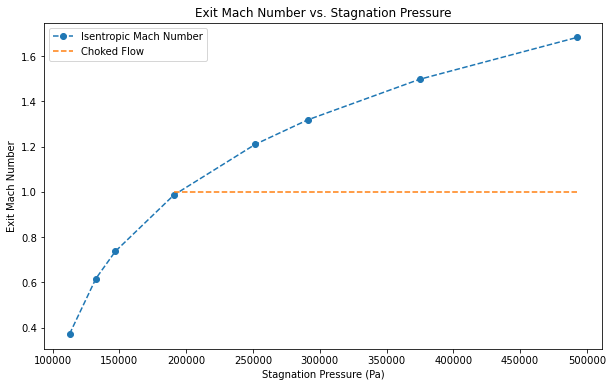

In [21]:
#number 2
P_exit_2a, V_exit_2a, Rho_2a, M_exit_2a = get2aValues()
thrust_2a = thrust(P_exit_2a, p_amb, A_exit, V_exit_2a, Rho_2a)

P_exit_2b, V_exit_2b, Rho_2b, M_exit_2b = get2bValues()
thrust_2b = thrust(P_exit_2b, p_amb, A_exit, V_exit_2b, Rho_2b)

P_exit_2c, V_exit_2c, Rho_2c, M_exit_2c, M_isentropic_2c = get2cValues()
thrust_2c = thrust(P_exit_2c, p_amb, A_exit, V_exit_2c, Rho_2c)

plt.figure(figsize=(10, 6))
plt.plot(stagPress, M_isentropic_2c, marker='o', linestyle='--', label='Isentropic Mach Number')
plt.plot(stagPress[3:], np.ones(len(stagPress[3:])), linestyle='--', label='Choked Flow')
plt.title('Exit Mach Number vs. Stagnation Pressure')
plt.xlabel('Stagnation Pressure (Pa)')
plt.ylabel('Exit Mach Number')
plt.legend()
plt.show()

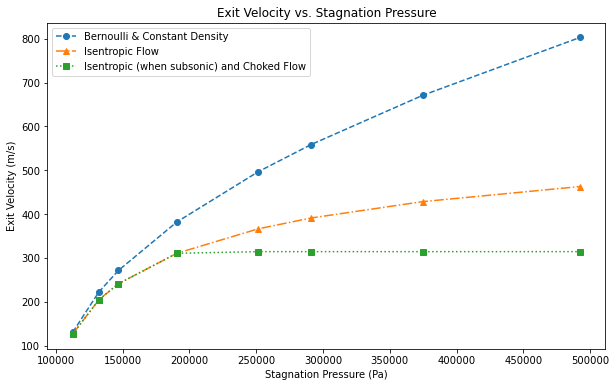

In [22]:
#number 3
plt.figure(figsize=(10, 6))
plt.plot(stagPress, V_exit_2a, marker='o', linestyle='--', label='Bernoulli & Constant Density')
plt.plot(stagPress, V_exit_2b, marker='^', linestyle='-.', label='Isentropic Flow')
plt.plot(stagPress, V_exit_2c, marker='s', linestyle=':', label='Isentropic (when subsonic) and Choked Flow')
plt.title('Exit Velocity vs. Stagnation Pressure')
plt.xlabel('Stagnation Pressure (Pa)')
plt.ylabel('Exit Velocity (m/s)')
plt.legend()
plt.show()


In [23]:
#number 4
df_prob_1 = pd.DataFrame({'Bernoulli': thrust_2a, 'Isentropic': thrust_2b, 'Isentropic (when subsonic) and Choked Flow': thrust_2c})
display(HTML(df_prob_1.to_html(index=False)))

Bernoulli,Isentropic,Isentropic (when subsonic) and Choked Flow
0.416442,0.402320,0.402320
1.215783,1.106399,1.106399
1.805508,1.579114,1.579114
3.577475,2.823317,2.823317
6.053757,4.257383,4.393366
7.646851,5.052314,5.403251
11.037066,6.517605,7.552357
15.810757,8.226821,10.578469


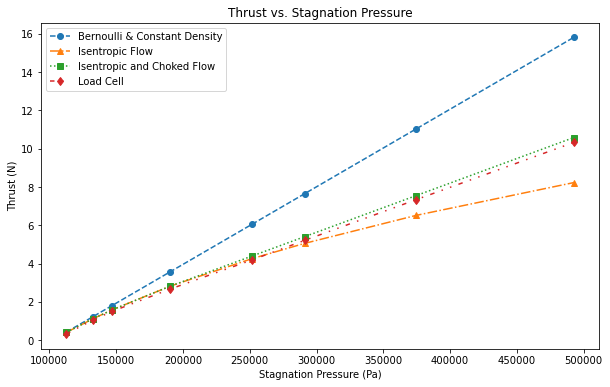

In [24]:
#number 5
plt.figure(figsize=(10, 6))
plt.plot(stagPress, thrust_2a, marker='o', linestyle='--', label='Bernoulli & Constant Density')
plt.plot(stagPress, thrust_2b, marker='^', linestyle='-.', label='Isentropic Flow')
plt.plot(stagPress, thrust_2c, marker='s', linestyle=':', label='Isentropic and Choked Flow')
plt.plot(stagPress, thrust_1, marker='d', linestyle=(0, (3, 5, 1, 5, 1, 5)), label='Load Cell')
plt.title('Thrust vs. Stagnation Pressure')
plt.xlabel('Stagnation Pressure (Pa)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.show()